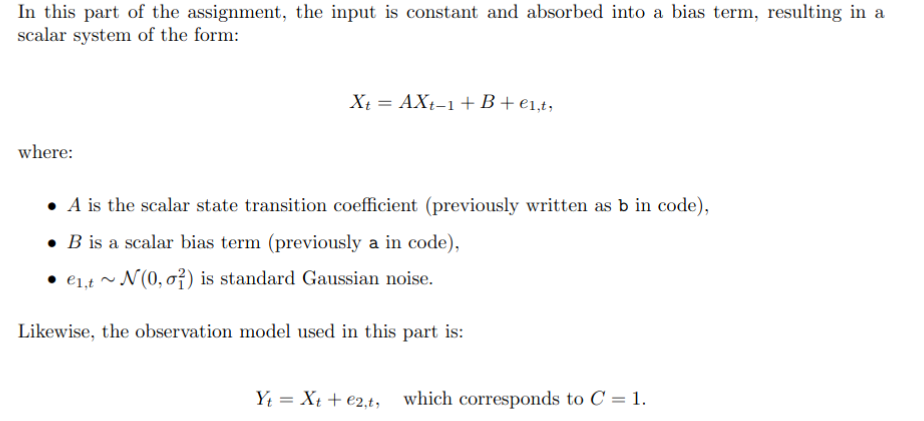

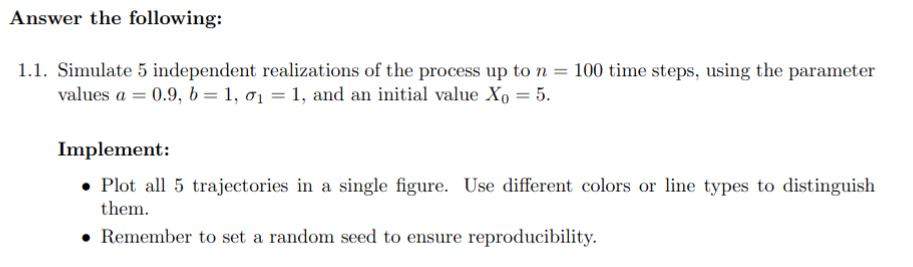

In [2]:
# parameters for simulation
a <- matrix(c(0.9),nrow=1)
b <- matrix(c(1),nrow=1)
c <- matrix(c(1),nrow=1)
sigma1 <- matrix(c(1),nrow=1)

# Initial value
x0 <- matrix(c(5),nrow=1)

# Number of observations
n <- 100

# Vector of observations
x <- rep(NA,n)
y <- rep(NA,n)


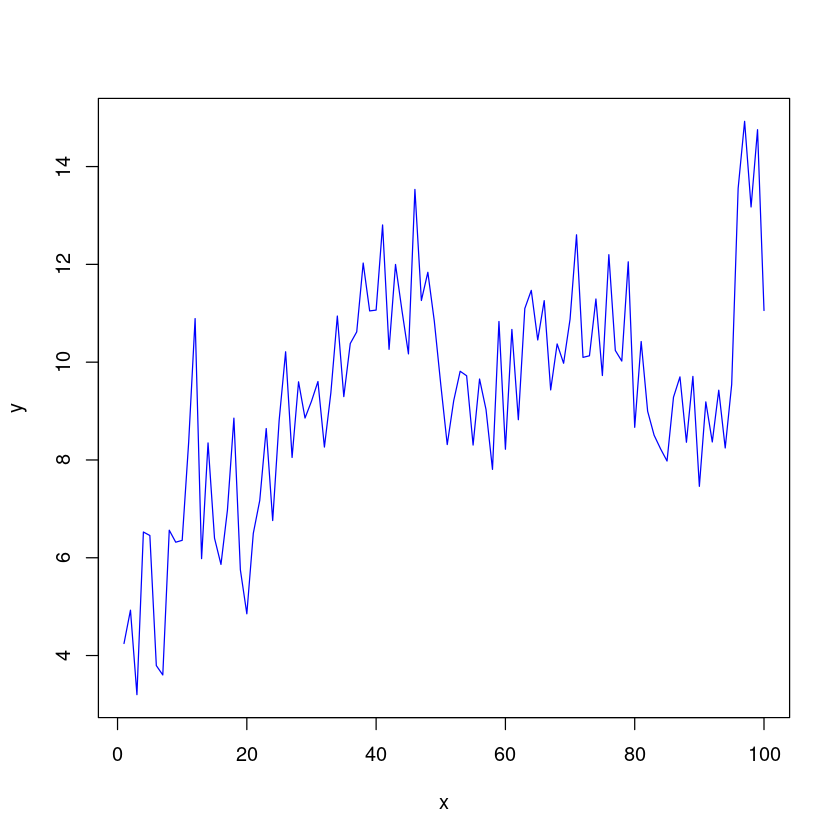

In [10]:
# set seed
set.seed(25)

# Run simulation
x[1] <- a*x0 + b + rnorm(1,0,sigma1)
y[1] <- c*x[1] + rnorm(1,0,sigma1)
for (i in 2:n){
    x[i] <- a*x[i-1] + b + rnorm(1,0,sigma1)
    y[i] <- c*x[i] + rnorm(1,0,sigma1)
}

# Plot the data
par(bg="white")
plot(1:n, y,type = "l", pch=19, col="blue", xlab="x", ylab="y")

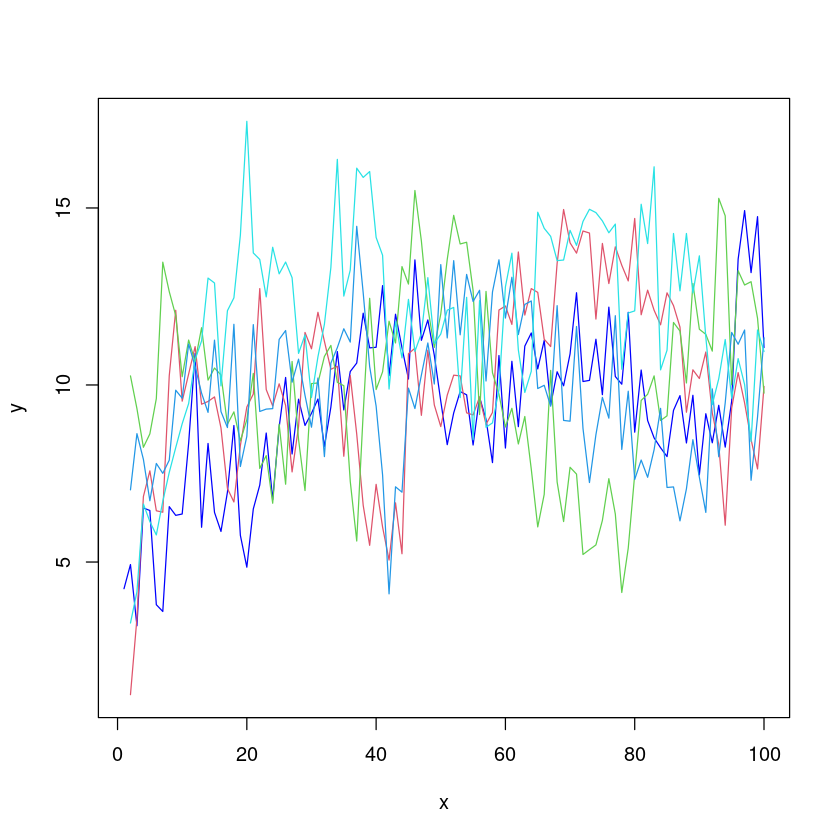

In [11]:
# 5 realizations
x_5 <- matrix(NA, nrow=n, ncol=5)
y_5 <- matrix(NA, nrow=n, ncol=5)
# set seed
set.seed(25)

# Run simulation

for (j in 1:5){
x_5[1,j] <- a*x0 + b + rnorm(1,0,sigma1)
    for (i in 2:n){
        x_5[i,j] <- a*x_5[i-1,j] + b + rnorm(1,0,sigma1)
        y_5[i,j] <- c*x_5[i,j] + rnorm(1,0,sigma1)
    }
}

# Plot the data
par(bg="white")
plot(1:n, y,type = "l", pch=19, col="blue", xlab="x", ylab="y", ylim = range(y_5,na.rm = TRUE))
for (j in 2:5){
    lines(1:n, y_5[,j], col= j)
}

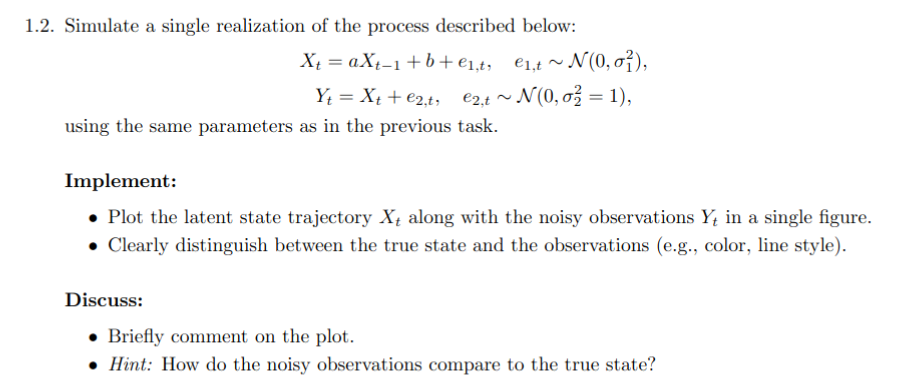

png 
  3

pdf 
  2

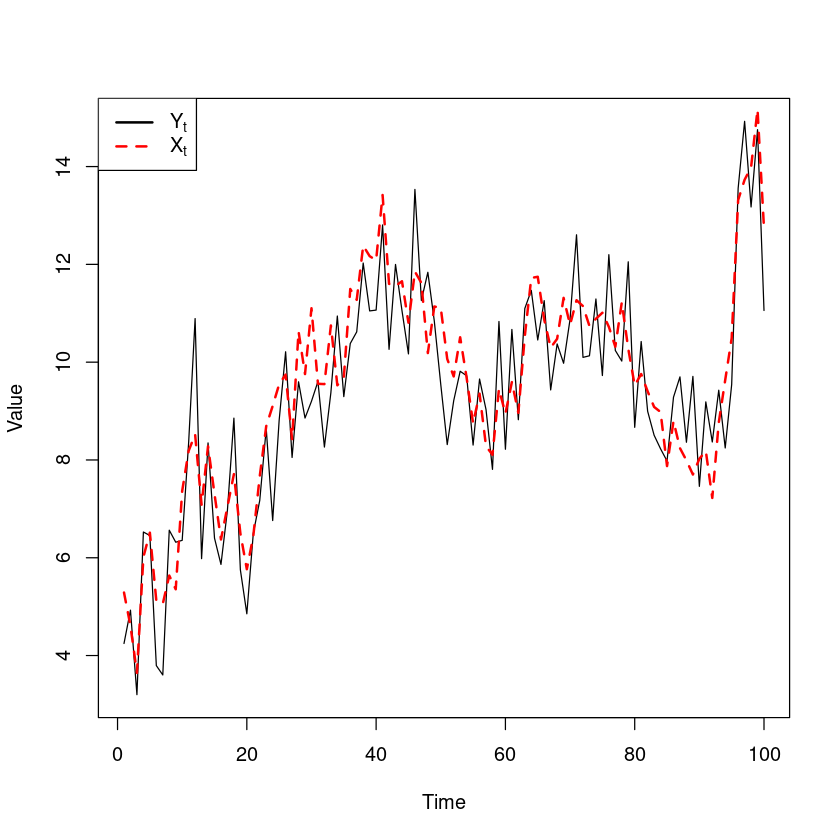

In [12]:
par(bg = "white")
plot(1:n, y, type = "l", pch=19, col="black", xlab="Time", ylab="Value", ylim = range(y,na.rm = TRUE))
lines(1:n, x, lty = 2, lwd = 2, pch = 19, col="red")
legend("topleft", legend=c(expression(Y[t]), expression(X[t])), col=c("black", "red"), lty=c(1, 2), lwd=c(2, 2))
# save the plot
dev.copy(png, filename = "1_2.png", width = 800, height = 600)
dev.off()

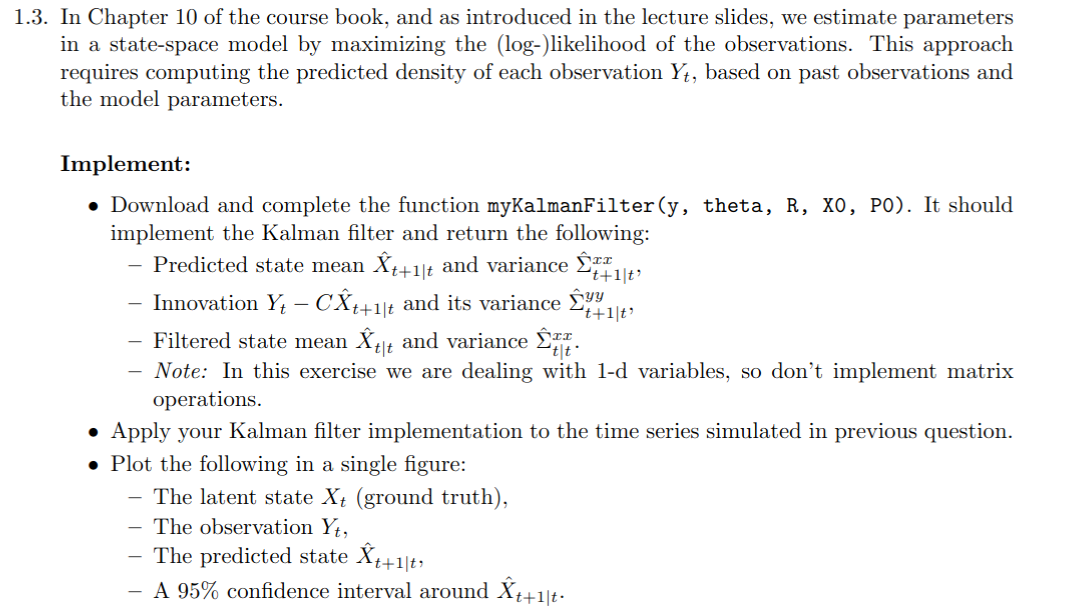

png 
  3

pdf 
  2

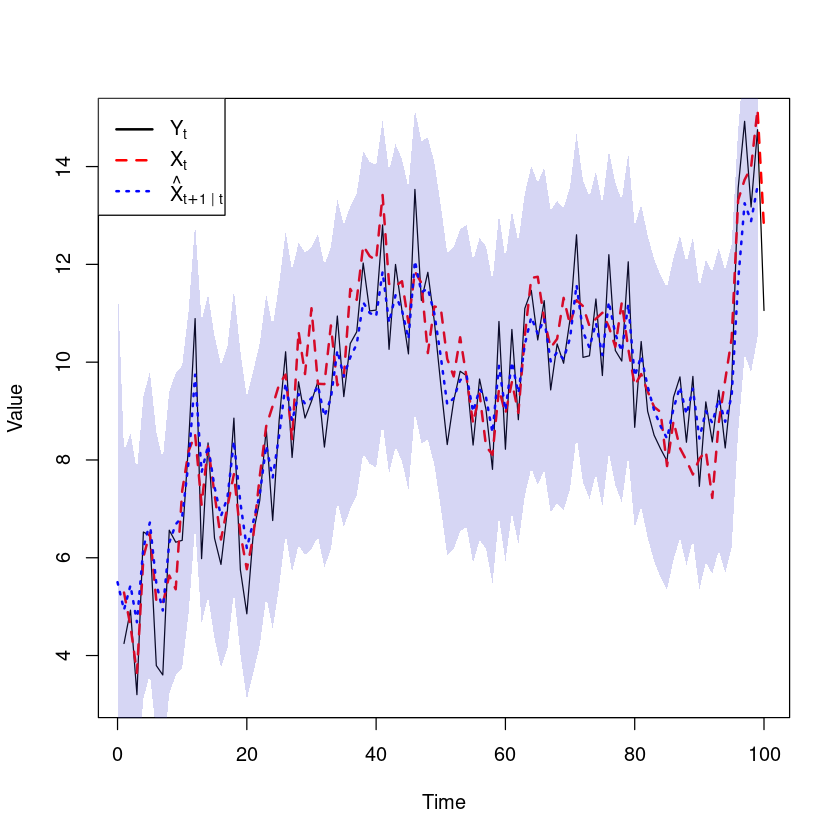

In [25]:
# include functions
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])

# apply kalman filter
results <- oiaKalmanFilter(y = y, theta = c(b,a,sigma1), R = 1, x_prior = x0, P_prior = 10)
# returnes list 
#return(list(
#    x_pred = x_pred,
#    P_pred = P_pred,
#    x_filt = x_filt,
#    P_filt = P_filt,
#    innovation = innovation,
#    innovation_var = innovation_var

# 95 % prediction interval
z_value <- 1.96  # 95% confidence interval approx normal dist because of large n 

upper <- rep(NA,n)
lower <- rep(NA,n)
for (i in 1:n){
    se <- sqrt(results$innovation_var[i]) # prediction error variance (from the Kalman filter)

    upper[i] <- results$x_pred[i] + z_value * se
    lower[i] <- results$x_pred[i] - z_value * se
}
#upper <- results$x_pred[1] + z_value * se
#lower <- results$x_pred[1] - z_value * se

# right plot
par(bg = "white")
plot(1:n, y, type = "l", pch=19, col="black", xlab="Time", ylab="Value", ylim = range(y,na.rm = TRUE))
lines(1:n, x, lty = 2, lwd = 2, pch = 19, col="red")
lines(0:(n-1),results$x_pred, lty = 3, lwd = 2, pch = 19, col="blue")
#color area corresponding to confidence interval
polygon(c(0:(n-1), rev(0:(n-1))), c(upper, rev(lower)), col=rgb(0.2,0.2,0.8,0.2), border=NA)

legend("topleft", legend=c(expression(Y[t]), expression(X[t]), expression(hat(X)[t+1~"|"~t])),
    col=c("black", "red", "blue"), lty=c(1, 2, 3), lwd=c(2, 2, 2))
# save the plot
dev.copy(png, filename = "1_3.png", width = 800, height = 600)
dev.off()
